In [2]:
import pickle
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
parameters = {
    'path': os.path.dirname(sys.path[0]),
    'path_in': os.path.join(os.path.dirname(sys.path[0]), '01_data'),
    'path_out': os.path.join(os.path.dirname(sys.path[0]), '02_output')
}

In [4]:
# Función para desempaquetar los archivos
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Lista para almacenar los datos
batches = []

# Update the data_dir path to the correct directory path
data_dir = os.path.join(parameters['path_in'], 'cifar-10-batches-py')

# Cargar cada archivo en la carpeta
for filename in os.listdir(data_dir):
    if filename.startswith('data_batch'):
        file_path = os.path.join(data_dir, filename)
        print(filename)
        data_dict = unpickle(file_path)
        batches.append(data_dict)

# Ahora 'data' es una lista con todas las imágenes del conjunto de datos
print(f'Número total de batches procesados: {len(batches)}')

data_batch_1
data_batch_2
data_batch_5
data_batch_4
data_batch_3
Número total de batches procesados: 5


In [5]:
# Extraer la data y las etiquetas
data = np.vstack([batch[b'data'] for batch in batches])
labels = np.hstack([batch[b'labels'] for batch in batches])

In [6]:
meta_data = unpickle(os.path.join(data_dir, 'batches.meta'))
label_meta = meta_data[b'label_names']
label_mapping = {i: label_meta[i].decode('utf-8') for i in range(len(label_meta))}
label_mapping

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

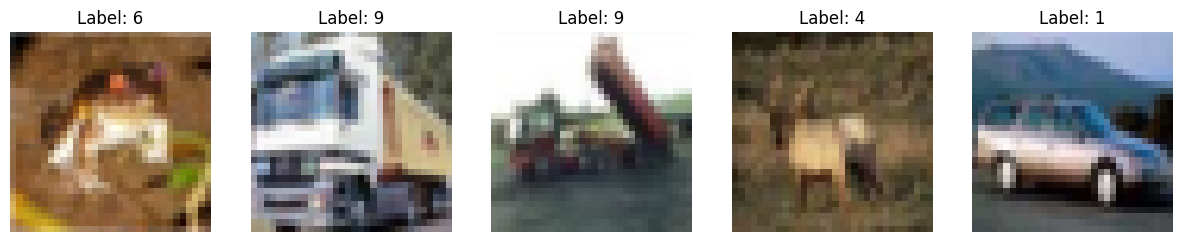

In [7]:
# Función para convertir los datos planos en imágenes de 32x32x3
def unpack_image(data, index):
    image = data[index].reshape(3, 32, 32).transpose(1, 2, 0)
    return image

# Visualizar las primeras 5 imágenes
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    img = unpack_image(data, i)
    ax.imshow(img)
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')
plt.show()

In [8]:
# Convertir la lista en un array de numpy
data_array = np.array(data)

# Convertir el array en un DataFrame de pandas
df = pd.DataFrame(data_array)
df["labels"] = labels
df["label_name"] = df["labels"].map(label_mapping)
df

,0,1,2,3,4,5,6,7,8,9,...,3064,3065,3066,3067,3068,3069,3070,3071,labels,label_name
0,59,43,50,68,98,119,139,145,149,149,...,65,59,46,57,104,140,84,72,6,frog
1,154,126,105,102,125,155,172,180,142,111,...,67,101,122,133,136,139,142,144,9,truck
2,255,253,253,253,253,253,253,253,253,253,...,80,69,66,72,79,83,83,84,9,truck
3,28,37,38,42,44,40,40,24,32,43,...,59,42,44,48,38,28,37,46,4,deer
4,170,168,177,183,181,177,181,184,189,189,...,85,82,83,79,78,82,78,80,1,automobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25,25,26,27,27,27,28,29,29,28,...,176,175,175,175,175,175,178,155,2,bird
49996,65,66,69,73,75,72,68,65,63,62,...,48,48,48,44,40,39,38,36,5,dog
49997,175,200,207,206,191,174,157,151,146,97,...,202,164,138,98,118,124,49,32,3,cat
49998,28,59,67,71,30,59,71,49,45,58,...,35,49,58,54,48,36,44,41,7,horse


In [9]:
df.value_counts("label_name")

label_name
airplane      5000
automobile    5000
bird          5000
cat           5000
deer          5000
dog           5000
frog          5000
horse         5000
ship          5000
truck         5000
Name: count, dtype: int64

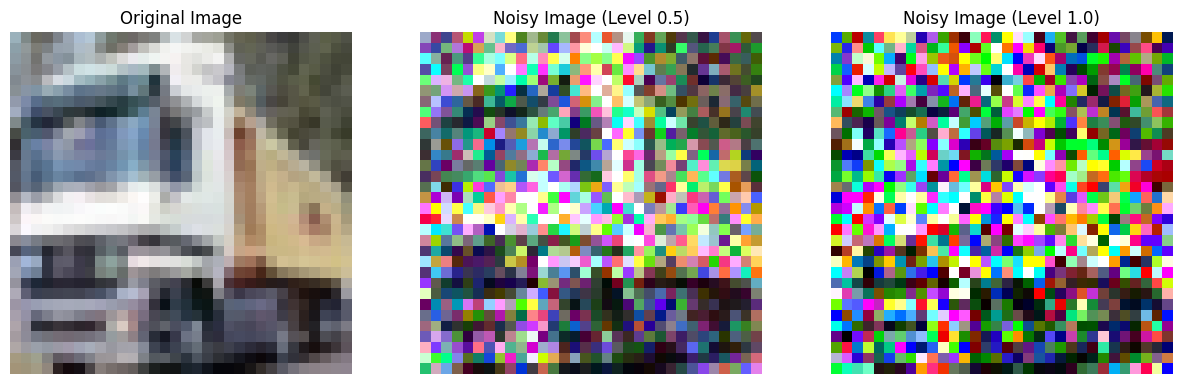

In [9]:
def add_speckle_noise(image, noise_level):
    # Generar ruido speckle
    noise = noise_level * np.random.randn(*image.shape)
    noisy_image = image + image * noise
    noisy_image = np.clip(noisy_image, 0, 255)  # Asegurar que los valores de píxel sigan siendo válidos
    return noisy_image.astype(np.uint8)

# Aplicar ruido speckle a la primera imagen con dos niveles diferentes de ruido
noise_levels = [0.5, 1.0]  # Desviación estándar para el ruido medio y alto
original_image = unpack_image(data, 1)
noisy_images = [add_speckle_noise(original_image, level) for level in noise_levels]

# Mostrar la imagen original y las imágenes con ruido
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, ax in enumerate(axes[1:], start=1):
    ax.imshow(noisy_images[i-1])
    ax.set_title(f'Noisy Image (Level {noise_levels[i-1]})')
    ax.axis('off')

plt.show()

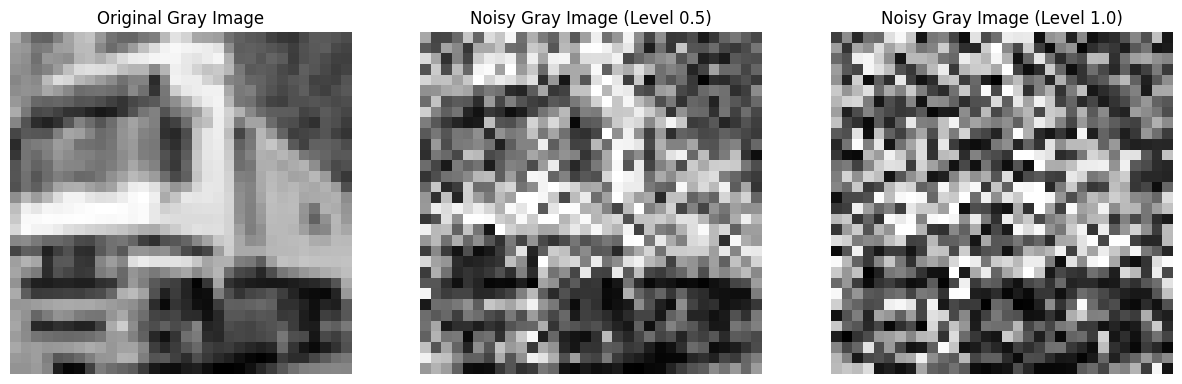

In [10]:

# RGB to grayscale = 0.2125 R + 0.7154 G + 0.0721 B
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2125, 0.7154, 0.0721])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
gray_original_image = rgb2gray(original_image)
axes[0].imshow(gray_original_image, cmap='gray')
axes[0].set_title('Original Gray Image')
axes[0].axis('off')

for i, ax in enumerate(axes[1:], start=1):
    gray_noisy_images = rgb2gray(noisy_images[i-1])
    ax.imshow(gray_noisy_images, cmap='gray')
    ax.set_title(f'Noisy Gray Image (Level {noise_levels[i-1]})')
    ax.axis('off')

plt.show()

In [11]:
# Generar ruido speckle para todas las imágenes en datasets diferentes
noisy_data_dir = os.path.join(parameters['path_out'], 'noisy-data')
os.makedirs(noisy_data_dir, exist_ok=True)

# df_noisy_medium = pd.DataFrame()
df_noisy_high = pd.DataFrame()
data_medium = []
label_noisy_image_medium = []
data_high = []


# Generar ruido speckle para todas las imágenes
for i, image in enumerate(data):
    noisy_image_medium = add_speckle_noise(unpack_image(data, i), 0.5).transpose(2, 0, 1).reshape(-1)
    # label_noisy_image_medium.append([labels[i], label_mapping[labels[i]]])
    # noisy_image_medium = np.append(noisy_image_medium, [labels[i], label_mapping[labels[i]]])

    noisy_image_high = add_speckle_noise(unpack_image(data, i), 1.0).transpose(2, 0, 1).reshape(-1)
    # noisy_image_high = np.append(noisy_image_high, [labels[i], label_mapping[labels[i]]])

    data_medium.append(noisy_image_medium)
    data_high.append(noisy_image_high)

df_noisy_medium = pd.DataFrame(data_medium)
df_noisy_medium["labels"] = labels
df_noisy_medium["label_name"] = df["labels"].map(label_mapping)
df_noisy_medium


In [41]:
label_noisy_image_medium

1